## 연습문제

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

#### 1. 월별 카페의 개수 - 막대 그래프

In [3]:
df_cafe = pd.read_csv('../input/cafe_2year.csv')
df_cafe.head()

,기준월,카페수
0,201710,79296
1,201711,80738
2,201712,76923
3,201801,77942
4,201802,84967


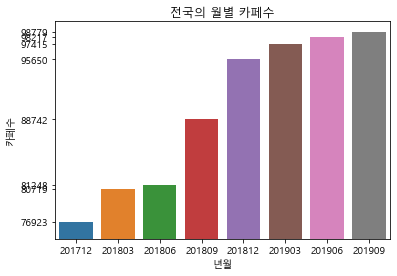

In [4]:
a1 = df_cafe['기준월'].tolist(); b1 = df_cafe['카페수'].tolist(); 
a2 = []; b2 = []
for i in range(2, len(a1), 3):
    a2.append(a1[i])
    b2.append(b1[i])

df1 = pd.DataFrame({
    "년월": a2,
    "카페수": b2
})
sns.barplot(x='년월', y='카페수', data=df1)
plt.ylim(75000, 100000)
plt.yticks(b2)
plt.title("전국의 월별 카페수")
plt.show()

#### 2. 서울을 포함한 7개 지역에 대해 의사 수 출력

In [5]:
df_doctor = pd.read_csv('../input/doctor_2019.csv')
df_doctor.head()

,지역,병원명,일반의 수,인턴 수,레지던트 수,전문의 수
0,인천,가톨릭대학교인천성모병원,1,22,68,201
1,서울,강북삼성병원,6,28,137,204
2,서울,건국대학교병원,1,37,164,225
3,대구,경북대학교병원,5,77,209,225
4,경남,경상대학교병원,1,35,114,182


In [6]:
df_doctor.describe()

,일반의 수,인턴 수,레지던트 수,전문의 수
count,355.000000,355.000000,355.000000,355.000000
mean,1.954930,8.163380,30.769014,82.366197
std,2.602302,18.901658,67.502355,113.457581
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,23.000000
50%,1.000000,0.000000,0.000000,38.000000
75%,2.000000,5.000000,21.000000,88.000000
max,25.000000,185.000000,551.000000,1020.000000


In [7]:
area = ['서울', '부산', '대구', '인천', '대전', '광주', '울산']
x = df_doctor.groupby('지역').sum()
y = x.reset_index()
df2 = y[y['지역'].isin(area)]
new_df2 = df2.sort_values('레지던트 수', ascending=False)
new_df2.reset_index(drop=True, inplace=True)
new_df2

,지역,일반의 수,인턴 수,레지던트 수,전문의 수
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


#### 3. 2번 문제에서 얻은 결과를 doctor2.csv 파일로 저장하는 프로그램을 작성하시오.

In [8]:
new_df2.to_csv('../input/doctor2.csv', index=False)

#### 4. doctor2.csv 파일을 읽어들여 전문의 의사 수를 산포 그래프로 작성

In [9]:
df_doctor2 = pd.read_csv('../input/doctor2.csv')
df_doctor2

,지역,일반의 수,인턴 수,레지던트 수,전문의 수
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


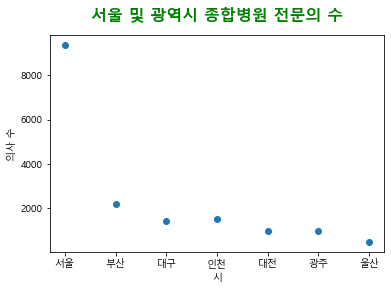

In [10]:
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.scatter(df_doctor2['지역'], df_doctor2['전문의 수'])
plt.xlabel('시'); plt.ylabel('의사 수')
plt.title('서울 및 광역시 종합병원 전문의 수',fontdict=title_font, pad=15)
plt.show()

#### 5. doctor2.csv파일을 읽어 일반의, 인턴, 레지던트, 전문의 의사 수를 선 그래프로 나타내시오.

In [11]:
df_doctor2 = pd.read_csv('../input/doctor2.csv')
df_doctor2

,지역,일반의 수,인턴 수,레지던트 수,전문의 수
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


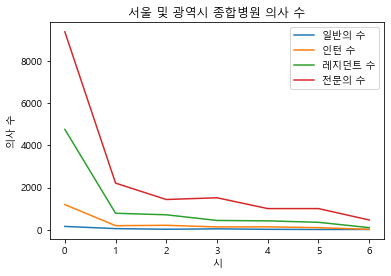

In [12]:
df_doctor2.plot()
plt.title("서울 및 광역시 종합병원 의사 수")
plt.xlabel("시"); plt.ylabel("의사 수")
plt.show()

#### 6. doctor2.csv 파일을 읽어 서울 종합병원의 의사 수 분포를 의사 유형별 파이 그래프로 나타내시오.

In [13]:
df_doctor2 = pd.read_csv('../input/doctor2.csv')
df_doctor2

,지역,일반의 수,인턴 수,레지던트 수,전문의 수
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


In [21]:
df6 = df_doctor2[df_doctor2['지역'] == '서울'].set_index('지역')
df6.loc["pct", :] = round(df6.sum() / df6.sum(axis=1)[0], 3) * 100
df6.columns = ['일반의', '인턴', '레지던트', '전문의']
df6

,일반의,인턴,레지던트,전문의
지역,,,,
서울,162.0,1196.0,4757.0,9375.0
pct,1.0,7.7,30.7,60.5


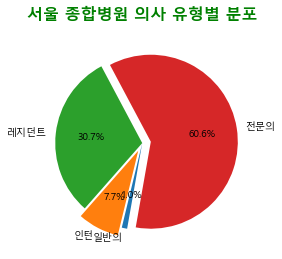

In [22]:
ratio = df6.loc['pct'].tolist()
labels = df6.columns.tolist()
explode = [0, 0.10, 0, 0.10]
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.title('서울 종합병원 의사 유형별 분포',fontdict=title_font, pad=15)
plt.show()